# Modelling Of SOFC
## ` Objective `- To analyse the effect of factors such as change in  `Temperature change` and `fuel flow rates` on Output voltage of SOFC.

### 1. Variation in Activation Losses
### 2. Variation in Ohmic Losses
### 3. Variation in Concetration Losses
### 4. Variation in Nenrst Voltage
### 5. Variation in Output Voltage
### 6. Variation in Power Output 
### 7. Voltage-Current variations



# Flow Chart

# 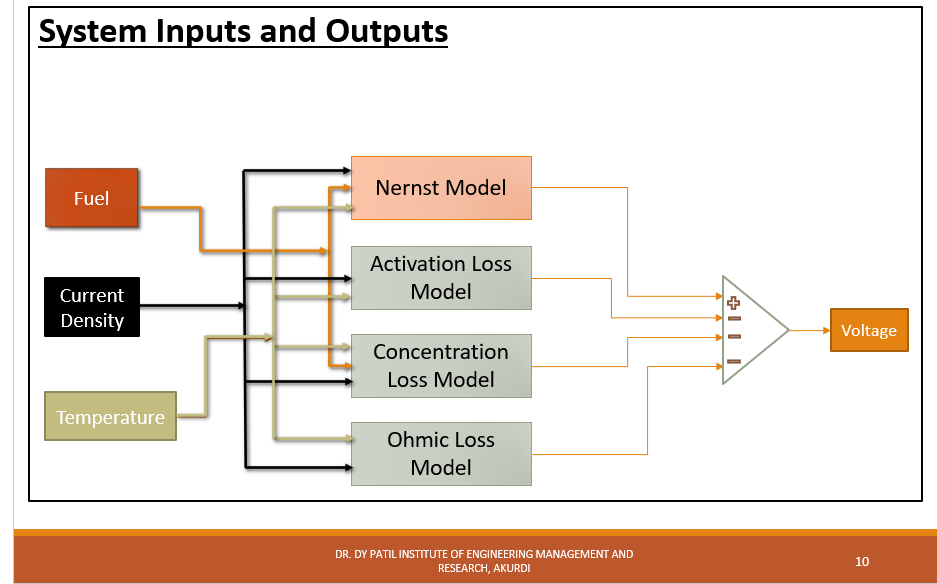

In [18]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

# Constants used in Model

In [19]:
I_L   = -0.14806 #input("Maximum Current density")              # Maximum current that can flow (10 A)
I0    = 2.00 #input("Exchange Current")                         # Exchange Current (say 2 A)
V_act = 0.1 #input("Activation Loss")                           # Activation Loss Not known(say 1)
r     = 5.00  #input("Internal Resistance")                     # Internal Resistance of SOFC(say 10 Ohm)

Y = 0.200                                                       # Constant used in Ohmic Losses
B = 2870.0                                                      # Constant used in Ohmic Losses

T0 = 973.0                                                      # Constant in K

E0 = 1.1                                                        # 1.1V Standerd Potential

R = 8.31400                                                     # Univeral Gas Constant in (J/mol-K)

F = 96486.0                                                     # Faradays Constant

alpha1 = 0.1                                                    # Approximate 0.1
alpha2 = 0.2                                                    # Approximate 0.1

n = 2.0                                                         # No. o moles

# Molar Valve constants for Hydrogen, Oxygen and Water
Kh2 = 0.843
Ko2 = 0.281
Kh2o = 2.52

# Response time for Hydrogen, Oxygen and Water
Th2 = 26.10
To2 = 2.91
Th2o = 78.3

Kr = 1.0/(8.0*F)


# 1. Inputs
## Fuel Flow Rates 
## `qh2 `- Flow rate of Hydrogen 
## `qo2 `- Flow rate of Oxygen
## Temperature Range - From `500K` to `1000K`

In [20]:
qh2 = 25.0                                        #[*np.arange(35.0, 50.0 , 2)]
qo2 = 25.0                                        #[*np.arange(35.0, 50.0 , 2)]
t   = [*np.arange(500,1000,50)]

print("Fuel flow Rate in ml/sec for Oxygen - ")
print(qh2)
print("Fuel flow Rate in ml/sec for Hydrogen - ")
print(qh2)
pd.DataFrame({"Temperature":t})

Fuel flow Rate in ml/sec for Oxygen - 
25.0
Fuel flow Rate in ml/sec for Hydrogen - 
25.0


,Temperature
0,500
1,550
2,600
3,650
4,700
5,750
6,800
7,850
8,900
9,950


# 2. Output Current Density (I_fc )
### ` I0 ` is the exchange current
### ` αi ` is the coefficient of charge transfer
### ` n = 2 ` is the number of moles of electrons transferred

In [21]:
I_fc_list =[]
for T in t :
    first_term  =  np.exp((alpha1*n*F/(R*T))*V_act)
    second_term =  np.exp((-alpha2*n*F/(R*T))*V_act)
    I_fc =  I0*(first_term - second_term)
    I_fc_list.append(I_fc)

I_fc = 1.1459
print(I_fc_list)
pd.DataFrame({"Output Current":I_fc_list})

[2.3911576814955398, 2.190085139990436, 2.022024230852373, 1.8791153493875878, 1.7558861337717933, 1.6483909643388774, 1.5537022698353224, 1.4695953048225792, 1.3943449194061772, 1.3265900422046977]


,Output Current
0,2.391158
1,2.190085
2,2.022024
3,1.879115
4,1.755886
5,1.648391
6,1.553702
7,1.469595
8,1.394345
9,1.326590


# 3. Partial Pressures
### •` qH2 ` is the fuel flow rate
### •` qO2 `is the oxygen flow rate 
### •` KH2 `,` KO2 `,` KH2O ` are the molar valve constants of hydrogen, oxygen and water respectively, 
### •` τH2 `,` τO2 `,` τH2O `, are the response times of hydrogen, oxygen and water respectively,
### •` τf ` is the fuel response time in seconds,
### •` Uopt ` is the optimum fuel utilization,
### •` rOH `is the ratio of hydrogen to oxygen
### •` Kr = 1/(8F)`


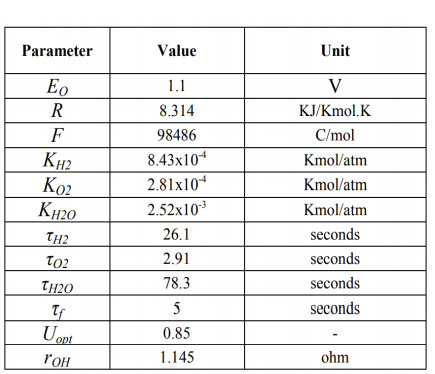

### Partial Pressure and found by following formulae.

In [22]:
Ph2_list = []
Po2_list = []
Ph2o_list = []

for I_fc in I_fc_list:
    item1 = ((1/Kh2)/(1+Th2))*(qh2 - 2*Kr*I_fc)
    Ph2_list.append(item1)

    
for I_fc in I_fc_list:
    item2 = ((1/Ko2)/(1+To2))*(qo2 - 2*Kr*I_fc) 
    Po2_list.append(item2)

for I_fc in I_fc_list:
    x =  (1/Kh2o)
    y = (1+Th2o)
    z = (2*Kr*I_fc)
    item3 = (x)/(y)*(z) 
    Ph2o_list.append(item3)
    
partial_pressure_vs_I_fc = pd.DataFrame({
                                          "I_fc Current":I_fc_list,
                                          "Ph2 - PP of Hydrogen" : Ph2_list,
                                           "Po2 - PP of Oxygen"  : Po2_list,
                                           "Ph2o - PP of Water" : Ph2o_list,
                                       })

print(partial_pressure_vs_I_fc )

   I_fc Current  Ph2 - PP of Hydrogen  Po2 - PP of Oxygen  Ph2o - PP of Water
0      2.391158              1.094317           22.753951        3.100346e-08
1      2.190085              1.094317           22.753952        2.839638e-08
2      2.022024              1.094317           22.753952        2.621732e-08
3      1.879115              1.094317           22.753952        2.436438e-08
4      1.755886              1.094317           22.753953        2.276661e-08
5      1.648391              1.094317           22.753953        2.137284e-08
6      1.553702              1.094317           22.753953        2.014512e-08
7      1.469595              1.094317           22.753953        1.905460e-08
8      1.394345              1.094317           22.753954        1.807891e-08
9      1.326590              1.094317           22.753954        1.720041e-08


# 4. Nernst Equation For (E_nernst)

#### E0 = 1.1 V is the standard potential
#### R = 8.314 kJ/ kmol .K is the universal gas constant
#### T = operating temperature of the fuel cell in kelvins
#### F = 96486 C/mol is the Faraday constant

   Temperature in K  Nernst Voltage in V
0               500             1.508041
1               550             1.550927
2               600             1.593984
3               650             1.637202
4               700             1.680571
5               750             1.724081
6               800             1.767726
7               850             1.811497
8               900             1.855388
9               950             1.899393


c:\users\shubham\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: 'str' object is not callable

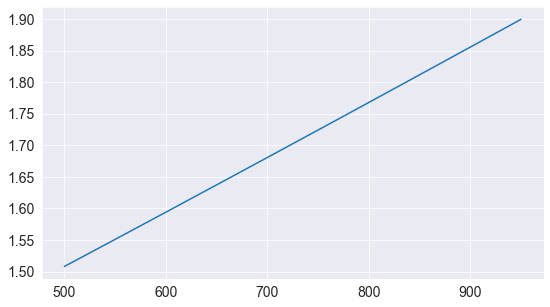

In [29]:
E_nernst = []

for T,Ph2,Po2,Ph2o in zip(t,Ph2_list,Po2_list,Ph2o_list):
    item = (E0 + (R*T/(2*F))*(math.log((Ph2*math.pow(Po2,0.5))/Ph2o)))
    E_nernst.append(item)

Temp_vs_Enernst = pd.DataFrame({
                                 "Temperature in K":t,
                                 "Nernst Voltage in V" : E_nernst,
                               })
print(Temp_vs_Enernst)

plt.plot(t,E_nernst)

plt.xlabel ='Temperature in K'
plt.ylabel ='Nernst Voltage in V'

plt.show()

# 5. Activation Losses 
### ` I0 ` is the exchange current 
### ` αi ` is the coefficient of charge transfer
### ` n = 2 ` is the number of moles of electrons transferred.

In [7]:
V_act = []

for T,I_fc in zip(t,I_fc_list):
    z = I_fc/(2.0*I0)
    item = ((R*T)/(2*alpha1*F))*(z+math.sqrt(1+math.pow(z,2)))
    V_act.append(item)

   Temperatures in K  Activation Losses in V
0                500                0.379752
1                550                0.399897
2                600                0.420331
3                650                0.440968
4                700                0.461754
5                750                0.482653
6                800                0.503639
7                850                0.524694
8                900                0.545805
9                950                0.566963


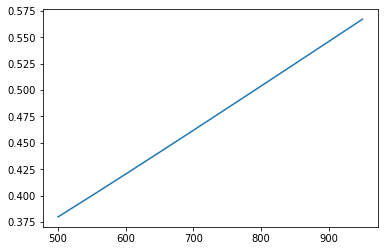

In [8]:
Temp_vs_Vact = pd.DataFrame({
                            "Temperatures in K":t,
                            "Activation Losses in V" : V_act,
                           })
 
print(Temp_vs_Vact)

plt.plot(t, V_act)

plt.xlabel="Temperatures in K"
plt.ylabel="Activation Losses in V"

plt.show()

# 6. Concentration Losses
### ` Cb ` is the concentration at the triple-phase boundary (tbp) where the gas, electrolyte,
### ` C∞ ` is the bulk concentration of reactant
### ` n ` is the number of moles of electrons participating in the reaction 
### `I L ` is the maximum possible current density of the cell at a given flowrate
### ` I fc ` is the given current density


In [9]:
V_conc = []
for T,I_fc in zip(t,I_fc_list):
    item = (R*T/(n*F))*(math.log(1-(I_fc/I_L)))
    V_conc.append(item)

   Temperature  Concentration Losses in V
0          500                   0.061222
1          550                   0.065390
2          600                   0.069406
3          650                   0.073282
4          700                   0.077028
5          750                   0.080652
6          800                   0.084162
7          850                   0.087566
8          900                   0.090870
9          950                   0.094079


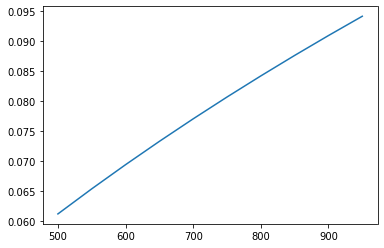

In [10]:
Temp_vs_Vconc = pd.DataFrame({
                              "Temperature":t,
                              "Concentration Losses in V" : V_conc,
                            })

print(Temp_vs_Vconc)

plt.plot(t,V_conc)

plt.xlabel="Temperatures in K"
plt.ylabel="Concentration Losses in V"

plt.show()

# 7. Ohmic Losses
### `T` is the fuel cell temperature
### `T0 = 973 K`
### `γ = 0.2 Ω,` and `β = −2870 K` are the constant coefficients of the fuel cell
### `r` is the internal resistance of the SOFC

   Temperature  Ohmic Losses in V
0          500           0.061222
1          550           0.065390
2          600           0.069406
3          650           0.073282
4          700           0.077028
5          750           0.080652
6          800           0.084162
7          850           0.087566
8          900           0.090870
9          950           0.094079


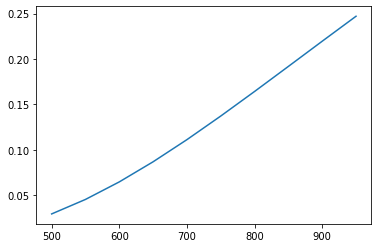

In [11]:
V_ohmic = []
for T,I_fc in zip(t,I_fc_list):
    item = (Y*(np.exp(B*((1/T0)-(1/T)))))*I_fc
    V_ohmic.append(item)
    
Temp_vs_Vohm = pd.DataFrame({
                             "Temperature":t,
                             "Ohmic Losses in V" : V_conc,
                            })
print(Temp_vs_Vohm)

plt.plot(t,V_ohmic)

plt.xlabel="Temperatures in K"
plt.ylabel="Ohmic Losses in V"

plt.show()

# 8. Net Output Voltage 

## Output Voltage = Nernst Voltage – (Activation Loss + Concentration loss + Ohmic Loss )

## `V_out = E_nernst – (V_act + V_con + V_ohmic)`


   Temperature  Output Voltage in V
0          500             1.037704
1          550             1.040322
2          600             1.039615
3          650             1.036172
4          700             1.030633
5          750             1.023625
6          800             1.015723
7          850             1.007433
8          900             0.999182
9          950             0.991319


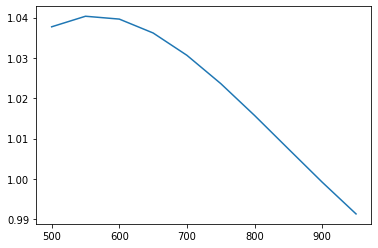

In [12]:

a = np.add(V_ohmic, V_conc)
b = np.add(a,V_act)

V_out = np.subtract(E_nernst, b)

Temp_vs_V_out = pd.DataFrame({
                             "Temperature":t,
                             "Output Voltage in V" : V_out,
                            })
print(Temp_vs_V_out)

plt.plot(t,V_out)

plt.xlabel="Temperatures in K"
plt.ylabel="Output Voltage in V"

plt.show()

# 9. Power in SOFC

   Temperature     Power
0          500  2.481315
1          550  2.278393
2          600  2.102126
3          650  1.947087
4          700  1.809675
5          750  1.687333
6          800  1.578130
7          850  1.480518
8          900  1.393204
9          950  1.315074


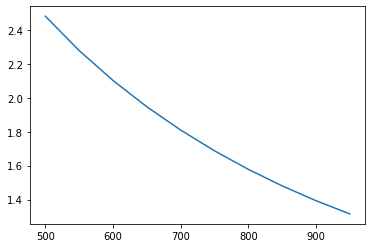

In [13]:
power = []
for Ifc, Vout in zip(I_fc_list,V_out):
    power.append(Ifc*Vout)
    
Temp_vs_power = pd.DataFrame({
                             "Temperature":t,
                             "Power" : power,
                            })
print(Temp_vs_power)

plt.plot(t,power)

plt.xlabel="Temperatures in K"
plt.ylabel="Power in W"

plt.show()

# Summary

## 1. Voltages vs Temperatures

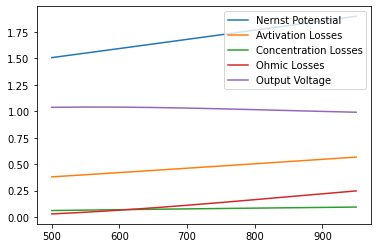

In [14]:
plt.plot(t,E_nernst, label="Nernst Potenstial")

plt.plot(t, V_act, label="Avtivation Losses")

plt.plot(t,V_conc, label="Concentration Losses")

plt.plot(t,V_ohmic, label="Ohmic Losses")

plt.plot(t,V_out, label="Output Voltage")

plt.legend()

plt.show()

## 2. Current vs Voltage

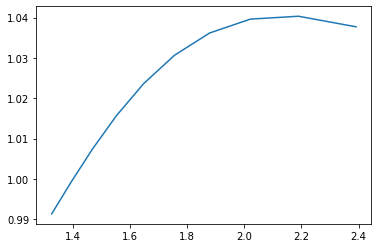

In [15]:
plt.plot(I_fc_list,V_out)
plt.xlabel = 'Current in A'
plt.ylabel = 'Output Voltage in V'
plt.show()

## 3. Power vs Temperature

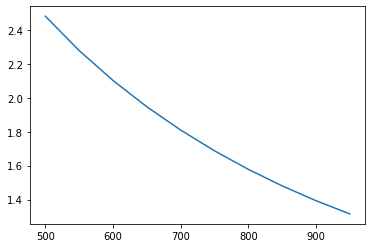

In [16]:
plt.plot(t,power)
plt.xlabel = 'Temperature in K'
plt.ylabel = 'Power in W'
plt.show()

# Data Chart

In [17]:
data = pd.DataFrame({
    "Temperature (K)" :t,
    "Nernst Voltage(V)":E_nernst,
    "Activation Losses(V)":V_act,
    "Concentration Losses(V)":V_conc,
    "Ohmic Losses(V)":V_ohmic,
    "Output Votage(V)":V_out,
    "Power (W)":power
})

data

,Temperature (K),Nernst Voltage(V),Activation Losses(V),Concentration Losses(V),Ohmic Losses(V),Output Votage(V),Power (W)
0,500,1.508041,0.379752,0.061222,0.029363,1.037704,2.481315
1,550,1.550927,0.399897,0.065390,0.045319,1.040322,2.278393
2,600,1.593984,0.420331,0.069406,0.064633,1.039615,2.102126
3,650,1.637202,0.440968,0.073282,0.086780,1.036172,1.947087
4,700,1.680571,0.461754,0.077028,0.111156,1.030633,1.809675
5,750,1.724081,0.482653,0.080652,0.137152,1.023625,1.687333
6,800,1.767726,0.503639,0.084162,0.164202,1.015723,1.578130
7,850,1.811497,0.524694,0.087566,0.191804,1.007433,1.480518
8,900,1.855388,0.545805,0.090870,0.219531,0.999182,1.393204
9,950,1.899393,0.566963,0.094079,0.247032,0.991319,1.315074
